<a href="https://colab.research.google.com/github/sarveshrastogi1/ML_Lab_1bm22cs247/blob/main/lab_9_k_mean_1bm22cs247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

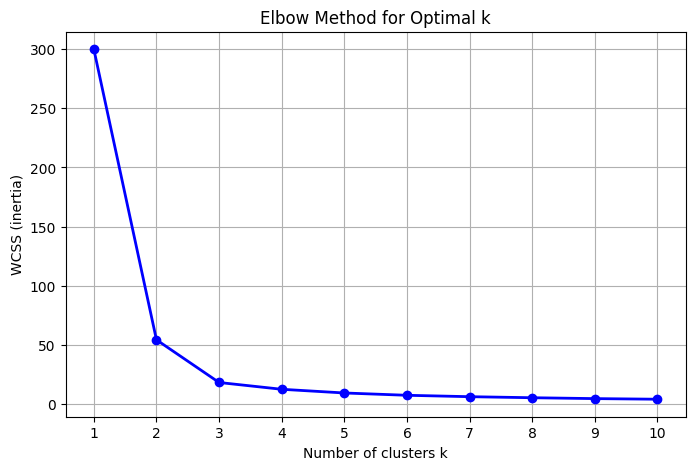

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("/content/iris (4).csv")  # assumes iris.csv in cwd

# 2. Select petal features
X = df[['petal_length', 'petal_width']].values

# 3. (Optional) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# If you skip scaling, use X instead of X_scaled below

# 4. Compute WCSS for k = 1..10
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS value

# 5. Draw elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (inertia)')
plt.xticks(K)
plt.grid(True)
plt.show()


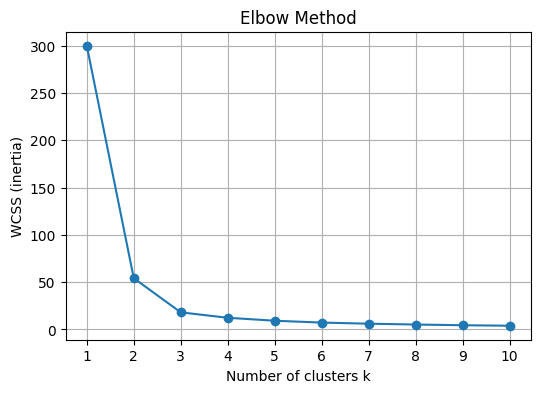

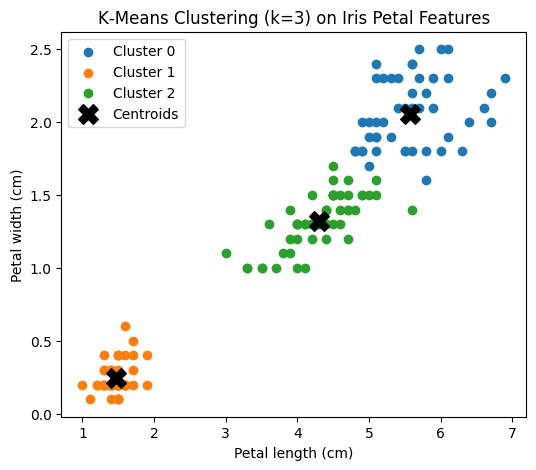


Cluster ↔ Species contingency table:

species  Iris-setosa  Iris-versicolor  Iris-virginica
cluster                                              
0                  0                2              46
1                 50                0               0
2                  0               48               4


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the Iris dataset (falls back to sklearn if iris.csv is missing)
try:
    df = pd.read_csv("/content/iris (4).csv")
except FileNotFoundError:
    from sklearn.datasets import load_iris
    iris = load_iris(as_frame=True)
    df = iris.frame
    df.rename(columns={"target": "species"}, inplace=True)

# 2. Select only petal length & width
X = df[["petal_length", "petal_width"]].values

# 3. (Optional but recommended) scale to zero mean/unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow plot to pick k (this you’ve already done; it shows k=3)
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters k")
plt.ylabel("WCSS (inertia)")
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

# 5. Fit final KMeans with k=3
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, init="k-means++", n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Add cluster labels back to DataFrame
df["cluster"] = clusters

# 7. Plot the clustered data (scaled back for interpretability)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(6,5))
for cluster_id in range(k_opt):
    mask = df["cluster"] == cluster_id
    plt.scatter(
        df.loc[mask, "petal_length"],
        df.loc[mask, "petal_width"],
        label=f"Cluster {cluster_id}"
    )
# plot cluster centers
plt.scatter(
    centers[:,0], centers[:,1],
    s=200, c="black", marker="X",
    label="Centroids"
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("K‑Means Clustering (k=3) on Iris Petal Features")
plt.legend()
plt.show()

# 8. (Optional) Compare clusters to true species
contingency = pd.crosstab(df["cluster"], df["species"])
print("\nCluster ↔ Species contingency table:\n")
print(contingency)
